In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score, confusion_matrix,classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

def compare_kmeans(x, cluster_list,silhouette_score_all):
    
    for k in cluster_list:
        #preparing the model
        model=KMeans(n_clusters=2, random_state=42)
        #training the model
        model.fit(x)
        

        # Compute silhouette score
        silhouette_avg = np.round(silhouette_score(x, model.labels_,random_state=42),decimals=4)

        # Print results
        print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")
        silhouette_scores_all.append(silhouette_avg)

## Load Data

In [3]:
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Baseline cluster model [K-Means]

### Trained Kmeans two times:
####    1. With Standarization
####    2. Without Standarization

## Approach 1 [using only numerical values]

### 1.1. With Standarization

Shape of x ::  (10000, 8)
Shape of y ::  (10000,)

Clusters center :: 
 [[-0.01304147 -0.02665487  0.02047794 -1.02734703  0.58296213  0.01614575
  -0.00334153 -0.01393557]
 [ 0.00947099  0.01935733 -0.01487152  0.7460813  -0.42335952 -0.01172539
   0.00242669  0.01012031]]

Generated label ::  [0 1 1 ... 0 0 1]
Actual Label ::  [1 0 1 ... 1 1 0]

For n_clusters = 2, the average silhouette_score is: 0.133

 Testing with different values of k :: 
For n_clusters = 0, the average silhouette_score is: 0.133
For n_clusters = 1, the average silhouette_score is: 0.133
For n_clusters = 2, the average silhouette_score is: 0.133
For n_clusters = 3, the average silhouette_score is: 0.133
For n_clusters = 4, the average silhouette_score is: 0.133
For n_clusters = 5, the average silhouette_score is: 0.133
For n_clusters = 6, the average silhouette_score is: 0.133
For n_clusters = 7, the average silhouette_score is: 0.133
For n_clusters = 8, the average silhouette_score is: 0.133
For n_clusters = 9,

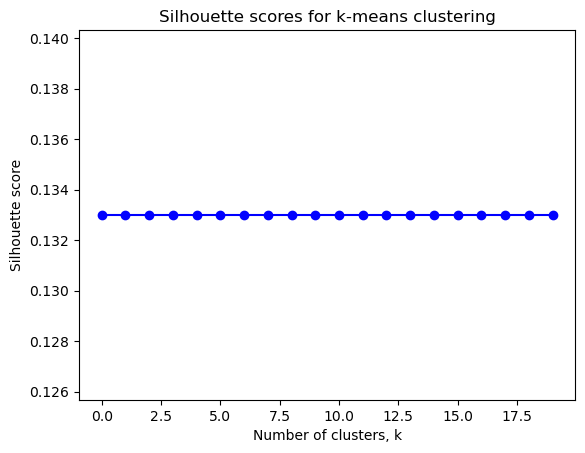

In [4]:
# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

# Drop all categorical columns
df.drop(['CustomerId','Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# ------------------------------------------------------------------------------------------------------

# Standarization
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# ------------------------------------------------------------------------------------------------------

#preparing the model
model=KMeans(n_clusters=2, random_state=42)

#training the model
model.fit(x)

# ------------------------------------------------------------------------------------------------------

print('\nClusters center :: \n', model.cluster_centers_)

print('\nGenerated label :: ', model.labels_)
print('Actual Label :: ', y.values)

# ------------------------------------------------------------------------------------------------------
silhouette_avg = np.round(silhouette_score(x, model.labels_, random_state=42),decimals=4)
print(f"\nFor n_clusters = {2}, the average silhouette_score is: {silhouette_avg}")

# ------------------------------------------------------------------------------------------------------
print('\n Testing with different values of k :: ')

cluster_list = [i for i in range(20)]
silhouette_scores_all = []
compare_kmeans(x,cluster_list, silhouette_scores_all)

# plot the Silhouette scores for each k value
plt.plot(cluster_list, silhouette_scores_all, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for k-means clustering')
plt.show()

a11_kmeans_cluster = cluster_list.copy()
a11_kmeans_score = silhouette_scores_all.copy()

### 1.2. Without Standarization

Shape of x ::  (10000, 8)
Shape of y ::  (10000,)

Clusters center :: 
 [[6.51194418e+02 3.92071636e+01 4.98499516e+00 1.21906441e+05
  1.38512423e+00 6.97483059e-01 5.12907389e-01 1.00787956e+05]
 [6.49443714e+02 3.84566018e+01 5.05812730e+00 2.44154891e+03
  1.76670174e+00 7.18569174e-01 5.18674382e-01 9.89528261e+04]]

Generated label ::  [1 0 0 ... 1 0 0]
Actual Label ::  [1 0 1 ... 1 1 0]

For n_clusters = 2, the average silhouette_score is: 0.4674

 Testing with different values of k :: 
For n_clusters = 0, the average silhouette_score is: 0.4674
For n_clusters = 1, the average silhouette_score is: 0.4674
For n_clusters = 2, the average silhouette_score is: 0.4674
For n_clusters = 3, the average silhouette_score is: 0.4674
For n_clusters = 4, the average silhouette_score is: 0.4674
For n_clusters = 5, the average silhouette_score is: 0.4674
For n_clusters = 6, the average silhouette_score is: 0.4674
For n_clusters = 7, the average silhouette_score is: 0.4674
For n_clusters = 8, t

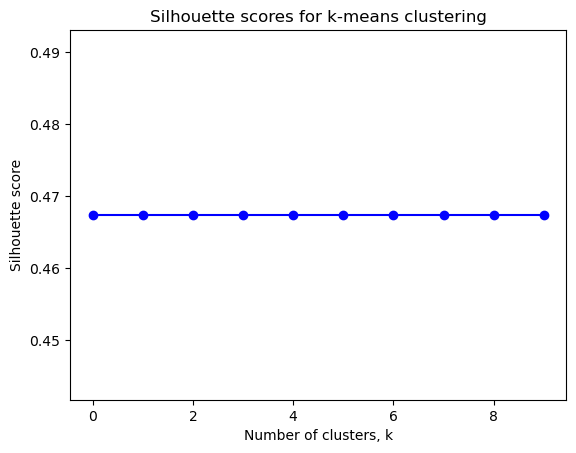

In [5]:
# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

# Drop all categorical columns
df.drop(['CustomerId','Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# ------------------------------------------------------------------------------------------------------

#preparing the model
model=KMeans(n_clusters=2, random_state=42)

#training the model
model.fit(x)

# ------------------------------------------------------------------------------------------------------

print('\nClusters center :: \n', model.cluster_centers_)

print('\nGenerated label :: ', model.labels_)
print('Actual Label :: ', y.values)

# ------------------------------------------------------------------------------------------------------
silhouette_avg = np.round(silhouette_score(x, model.labels_, random_state=42),decimals=4)
print(f"\nFor n_clusters = {2}, the average silhouette_score is: {silhouette_avg}")

# ------------------------------------------------------------------------------------------------------

print('\n Testing with different values of k :: ')

cluster_list = [i for i in range(10)]
silhouette_scores_all = []
compare_kmeans(x,cluster_list, silhouette_scores_all)

# plot the Silhouette scores for each k value
plt.plot(cluster_list, silhouette_scores_all, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for k-means clustering')
plt.show()

a12_kmeans_cluster = cluster_list.copy()
a12_kmeans_score = silhouette_scores_all.copy()

## Approach 2 [using numerical and categorical features]

In [6]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 2.1. With Standarization

In [30]:
# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

# df = df[df['Exited'] == 1]

customer_ids = df['CustomerId']
geography_info = df["Geography"]
gender_info = df['Gender']
surname_info = df['Surname']
credit_score_info = df['CreditScore']
age_info = df['Age']
tenure_info = df['Tenure']
balance_info = df['Balance']
num_prod_info = df['NumOfProducts']
has_cr_info = df['HasCrCard']
acive_info = df['IsActiveMember']
esti_sal_info = df['EstimatedSalary']



# ------------------------------------------------------------------------------------------------------

# Converting type of columns to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Surname'] = df['Surname'].astype('category')

# Assigning numerical values and storing it in another columns
df['Geography_new'] = df['Geography'].cat.codes
df['Gender_new'] = df['Gender'].cat.codes
df['Surname_new'] = df['Surname'].cat.codes

df['Geography'] = df['Geography_new']
df['Gender'] = df['Gender_new']
df['Surname'] = df['Surname_new']

df.drop(['CustomerId','Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)
# df.drop(['CustomerId', 'Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# ------------------------------------------------------------------------------------------------------

# Standarization
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# ------------------------------------------------------------------------------------------------------

#preparing the model
model=KMeans(n_clusters=2, random_state=42)

#training the model
model.fit(x)

# ------------------------------------------------------------------------------------------------------

print('\nClusters center :: \n', model.cluster_centers_)

print('\nGenerated label :: ', model.labels_)
print('Actual Label :: ', y.values)

# ------------------------------------------------------------------------------------------------------
silhouette_avg = np.round(silhouette_score(x, model.labels_, random_state=42),decimals=4)
print(f"\nFor n_clusters = {2}, the average silhouette_score is: {silhouette_avg}")

# ------------------------------------------------------------------------------------------------------

# print('\n Testing with different values of k :: ')

# cluster_list = [i for i in range(10)]
# silhouette_scores_all = []
# compare_kmeans(x,cluster_list, silhouette_scores_all)

# # plot the Silhouette scores for each k value
# plt.plot(cluster_list, silhouette_scores_all, 'bo-')
# plt.xlabel('Number of clusters, k')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette scores for k-means clustering')
# plt.show()

# a21_kmeans_cluster = cluster_list.copy()
# a21_kmeans_score = silhouette_scores_all.copy()

Shape of x ::  (10000, 11)
Shape of y ::  (10000,)

Clusters center :: 
 [[ 1.48948216e-02  9.55412912e-03  6.52706376e-02  2.08723854e-02
   1.91742477e-02 -1.54665014e-02  7.45079227e-01 -4.23443782e-01
  -5.93220559e-03 -5.14352662e-04  7.85801472e-03]
 [-2.05184490e-02 -1.31613467e-02 -8.99139501e-02 -2.87528770e-02
  -2.64135975e-02  2.13059698e-02 -1.02638827e+00  5.83317468e-01
   8.17194465e-03  7.08549530e-04 -1.08248543e-02]]

Generated label ::  [1 0 1 ... 1 1 0]
Actual Label ::  [1 0 1 ... 1 1 0]

For n_clusters = 2, the average silhouette_score is: 0.0975


In [28]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'cluster_labels'],
      dtype='object')

In [22]:
# df['CustomerId'] = customer_ids
# df['Surname'] = surname_info
# df['Geography'] = geography_info
# df['Gender'] = gender_info

df['cluster_labels'] = model.labels_
# df.to_csv('./final_results/k_menas_std_c1.csv', index=False, header=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster_labels
RowNumber,,,,,,,,,,,,,
1,465,619,0,0,42,2,0.00,1,1,1,101348.88,1,0
3,839,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1
6,229,645,2,1,44,8,113755.78,2,1,0,149756.71,1,1
8,816,376,1,0,29,4,115046.74,4,1,0,119346.88,1,1
17,935,653,1,1,58,1,132602.88,1,1,0,5097.67,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,140,498,1,1,42,3,152039.70,1,1,1,53445.17,1,0
9983,442,655,1,0,46,7,137145.12,1,1,0,115146.40,1,1
9992,13,597,0,0,53,4,88381.21,1,1,0,69384.71,1,1


In [31]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(x, index=df.index, columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'])
X_clustered["cluster"] = model.labels_
X_clustered

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,cluster
RowNumber,,,,,,,,,,,,
1,-0.464183,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
2,-0.390911,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
3,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
4,-1.440356,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1
5,0.371354,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.580534,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,1
9997,-0.203004,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9998,0.073539,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1


array([[<Axes: title={'center': 'Age'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Balance'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'CreditScore'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'EstimatedSalary'}, xlabel='[cluster]'>],
       [<Axes: title={'center': 'HasCrCard'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'IsActiveMember'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'NumOfProducts'}, xlabel='[cluster]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[cluster]'>]],
      dtype=object)

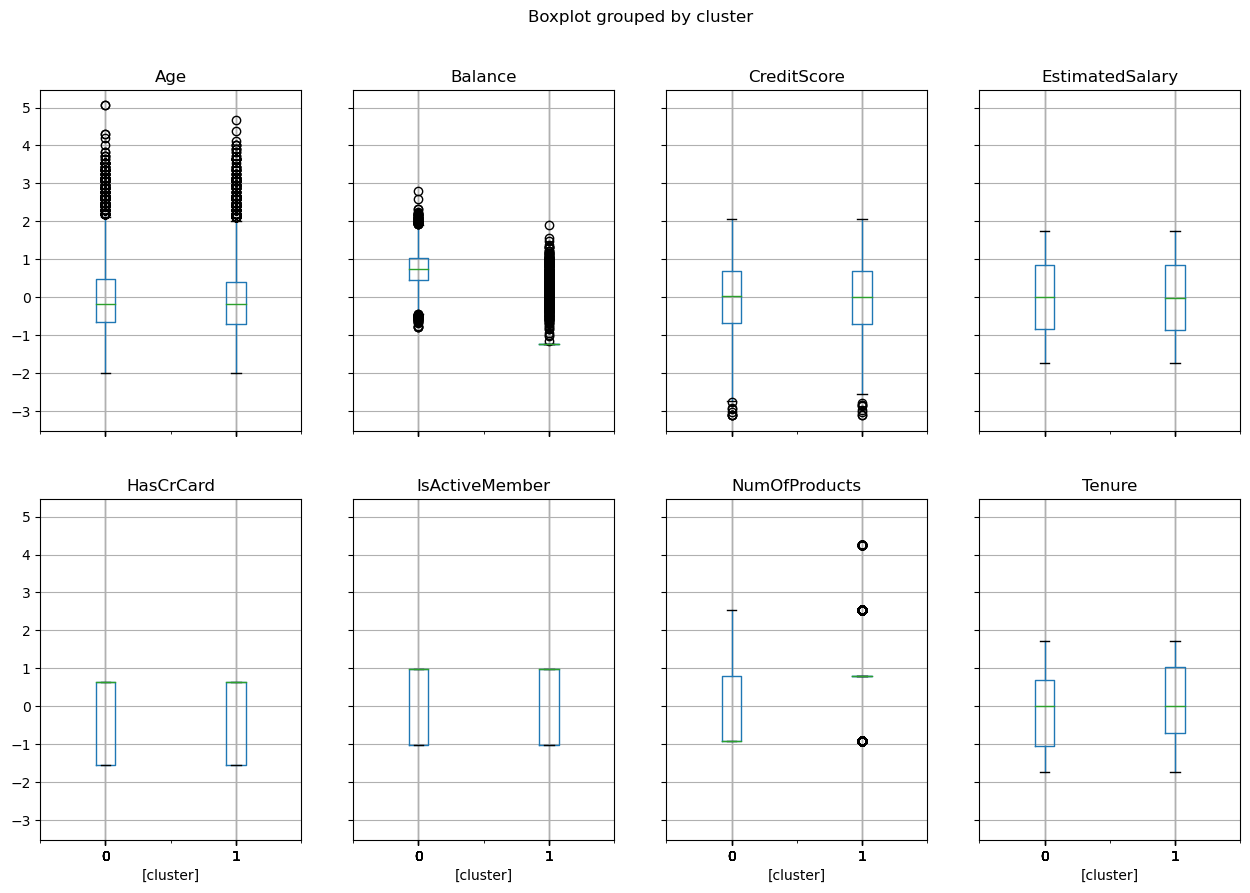

In [41]:
X_clustered.drop(['Surname', 'Gender', 'Geography'], axis=1).boxplot(by="cluster", figsize=(15,10), layout=(2,4))

In [36]:
X_clustered.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'cluster'],
      dtype='object')

In [35]:
from functions import *

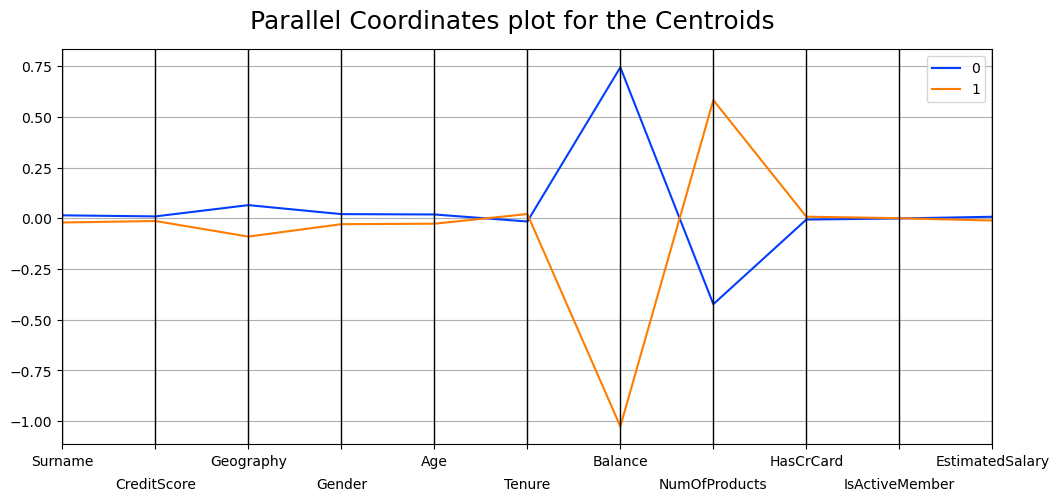

In [37]:
X_clustered.drop(['Surname', 'Gender', 'Geography'], axis=1).boxplot(by="cluster", figsize=(15,10), layout=(2,4))

# Create a data frame containing our centroids
centroids = pd.DataFrame(model.cluster_centers_, columns=X_clustered.columns[:-1])
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 2)

In [11]:
df[df['cluster_labels'] == 0].describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster_labels
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.0,735.0
mean,610.868027,645.247619,0.786395,0.436735,44.763265,4.789116,91320.636476,1.534694,0.655782,1.0,100654.022367,1.0,0.0
std,331.901774,97.869686,0.743238,0.496319,9.879437,2.936270,58574.133553,0.847231,0.475436,0.0,57903.233747,0.0,0.0
min,4.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.580000,1.0,0.0
25%,335.000000,581.000000,0.000000,0.000000,38.000000,2.000000,44441.750000,1.000000,0.000000,1.0,50543.215000,1.0,0.0
50%,618.000000,644.000000,1.000000,0.000000,45.000000,5.000000,109922.610000,1.000000,1.000000,1.0,102517.830000,1.0,0.0
75%,887.500000,715.500000,1.000000,1.000000,51.000000,7.000000,131393.860000,2.000000,1.000000,1.0,150677.920000,1.0,0.0
max,1184.000000,850.000000,2.000000,1.000000,74.000000,10.000000,250898.090000,4.000000,1.000000,1.0,199808.100000,1.0,0.0


### 2.2. Without Standarization

In [32]:
# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

customer_ids = df['CustomerId']
geography_info = df["Geography"]
gender_info = df['Gender']
surname_info = df['Surname']

# ------------------------------------------------------------------------------------------------------

# Converting type of columns to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Surname'] = df['Surname'].astype('category')

# Assigning numerical values and storing it in another columns
df['Geography_new'] = df['Geography'].cat.codes
df['Gender_new'] = df['Gender'].cat.codes
df['Surname_new'] = df['Surname'].cat.codes

df['Geography'] = df['Geography_new']
df['Gender'] = df['Gender_new']
df['Surname'] = df['Surname_new']

df.drop(['CustomerId', 'Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)
# df.drop(['CustomerId', 'Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# ------------------------------------------------------------------------------------------------------

#preparing the model
model=KMeans(n_clusters=2, random_state=42)

#training the model
model.fit(x)

# ------------------------------------------------------------------------------------------------------

print('\nClusters center :: \n', model.cluster_centers_)

print('\nGenerated label :: ', model.labels_)
print('Actual Label :: ', y.values)

# ------------------------------------------------------------------------------------------------------
silhouette_avg = np.round(silhouette_score(x, model.labels_, random_state=42),decimals=4)
print(f"\nFor n_clusters = {2}, the average silhouette_score is: {silhouette_avg}")

# ------------------------------------------------------------------------------------------------------
# print('\n Testing with different values of k :: ')
# cluster_list = [i for i in range(10)]
# silhouette_scores_all = []
# compare_kmeans(x,cluster_list, silhouette_scores_all)

# # plot the Silhouette scores for each k value
# plt.plot(cluster_list, silhouette_scores_all, 'bo-')
# plt.xlabel('Number of clusters, k')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette scores for k-means clustering')
# plt.show()

# a22_kmeans_cluster = cluster_list.copy()
# a22_kmeans_score = silhouette_scores_all.copy()

Shape of x ::  (10000, 11)
Shape of y ::  (10000,)

Clusters center :: 
 [[1.51221394e+03 6.51194418e+02 7.95256534e-01 5.48402711e-01
  3.92071636e+01 4.98499516e+00 1.21906441e+05 1.38512423e+00
  6.97483059e-01 5.12907389e-01 1.00787956e+05]
 [1.50053656e+03 6.49443714e+02 6.66491320e-01 5.41294056e-01
  3.84566018e+01 5.05812730e+00 2.44154891e+03 1.76670174e+00
  7.18569174e-01 5.18674382e-01 9.89528261e+04]]

Generated label ::  [1 0 0 ... 1 0 0]
Actual Label ::  [1 0 1 ... 1 1 0]

For n_clusters = 2, the average silhouette_score is: 0.4673


In [8]:
df.drop(['Surname', 'Geography', 'Gender'], axis=1, inplace=True)


df['CustomerId'] = customer_ids
df['Surname'] = surname_info
df['Geography'] = geography_info
df['Gender'] = gender_info
df['CreditScore'] = credit_score_info
df['Age'] = age_info
df['Tenure'] = tenure_info
df['Balance'] = balance_info
df['NumOfProducts'] = num_prod_info
df['HasCrCard'] = has_cr_info
df['IsActiveMember'] = acive_info
df['EstimatedSalary'] = esti_sal_info

df['cluster_labels'] = model.labels_
df.to_csv('./final_results/clusters_k_menas_std.csv', index=False, header=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CustomerId,Surname,Geography,Gender,cluster_labels
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,15634602,Hargrave,France,Female,1
2,608,41,1,83807.86,1,0,1,112542.58,0,15647311,Hill,Spain,Female,0
3,502,42,8,159660.80,3,1,0,113931.57,1,15619304,Onio,France,Female,1
4,699,39,1,0.00,2,0,0,93826.63,0,15701354,Boni,France,Female,1
5,850,43,2,125510.82,1,1,1,79084.10,0,15737888,Mitchell,Spain,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,15606229,Obijiaku,France,Male,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,15569892,Johnstone,France,Male,0
9998,709,36,7,0.00,1,0,1,42085.58,1,15584532,Liu,France,Female,1


# Agglomerative Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

# df=df[df.Exited == 1]

customer_ids = df['CustomerId']
geography_info = df["Geography"]
gender_info = df['Gender']
surname_info = df['Surname']
credit_score_info = df['CreditScore']
age_info = df['Age']
tenure_info = df['Tenure']
balance_info = df['Balance']
num_prod_info = df['NumOfProducts']
has_cr_info = df['HasCrCard']
acive_info = df['IsActiveMember']
esti_sal_info = df['EstimatedSalary']

# ------------------------------------------------------------------------------------------------------

# Converting type of columns to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Surname'] = df['Surname'].astype('category')

# Assigning numerical values and storing it in another columns
df['Geography_new'] = df['Geography'].cat.codes
df['Gender_new'] = df['Gender'].cat.codes
df['Surname_new'] = df['Surname'].cat.codes

df['Geography'] = df['Geography_new']
df['Gender'] = df['Gender_new']
df['Surname'] = df['Surname_new']

df.drop(['CustomerId', 'Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)
# df.drop(['CustomerId', 'Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# Standarization
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# ------------------------------------------------------------------------------------------------------

# Perform hierarchical clustering
n_clusters = 4  # Number of clusters you want to create
model = AgglomerativeClustering(n_clusters=n_clusters)
clusters = model.fit_predict(x)

# ------------------------------------------------------------------------------------------------------

# print('\nClusters center :: \n', model.cluster_centers_)

print('\nGenerated label :: ', clusters)
print('Actual Label :: ', y.values)

# ------------------------------------------------------------------------------------------------------
silhouette_avg = np.round(silhouette_score(x, clusters, random_state=42),decimals=4)
print(f"\nFor n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

# # ------------------------------------------------------------------------------------------------------
# print('\n Testing with different values of k :: ')
# cluster_list = [i for i in range(2,20)]
# silhouette_scores_all = []
# # compare_kmeans(x,cluster_list, silhouette_scores_all)

# for k in cluster_list:
    
#     model = AgglomerativeClustering(n_clusters=k)
#     clusters = model.fit_predict(x)


#     # Compute silhouette score
#     silhouette_avg = np.round(silhouette_score(x, clusters,random_state=42),decimals=4)

#     # Print results
#     print(f"For n_clusters = {k}, the average silhouette_score is: {silhouette_avg}")
#     silhouette_scores_all.append(silhouette_avg)

# # plot the Silhouette scores for each k value
# plt.plot(cluster_list, silhouette_scores_all, 'bo-')
# plt.xlabel('Number of clusters, k')
# plt.ylabel('Silhouette score')
# plt.title('Silhouette scores for k-means clustering')
# plt.show()

# a22_agc_cluster = cluster_list.copy()
# a22_agc_score = silhouette_scores_all.copy()

Shape of x ::  (10000, 11)
Shape of y ::  (10000,)

Generated label ::  [0 1 0 ... 1 3 3]
Actual Label ::  [1 0 1 ... 1 1 0]

For n_clusters = 4, the average silhouette_score is: 0.0657


In [46]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(x, index=df.index, columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'])
X_clustered["cluster"] = clusters
X_clustered

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,cluster
RowNumber,,,,,,,,,,,,
1,-0.464183,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0
2,-0.390911,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1
3,0.628988,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0
4,-1.440356,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1
5,0.371354,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.580534,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9997,-0.203004,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9998,0.073539,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1


In [50]:
means =  X_clustered.groupby(by="cluster").mean()

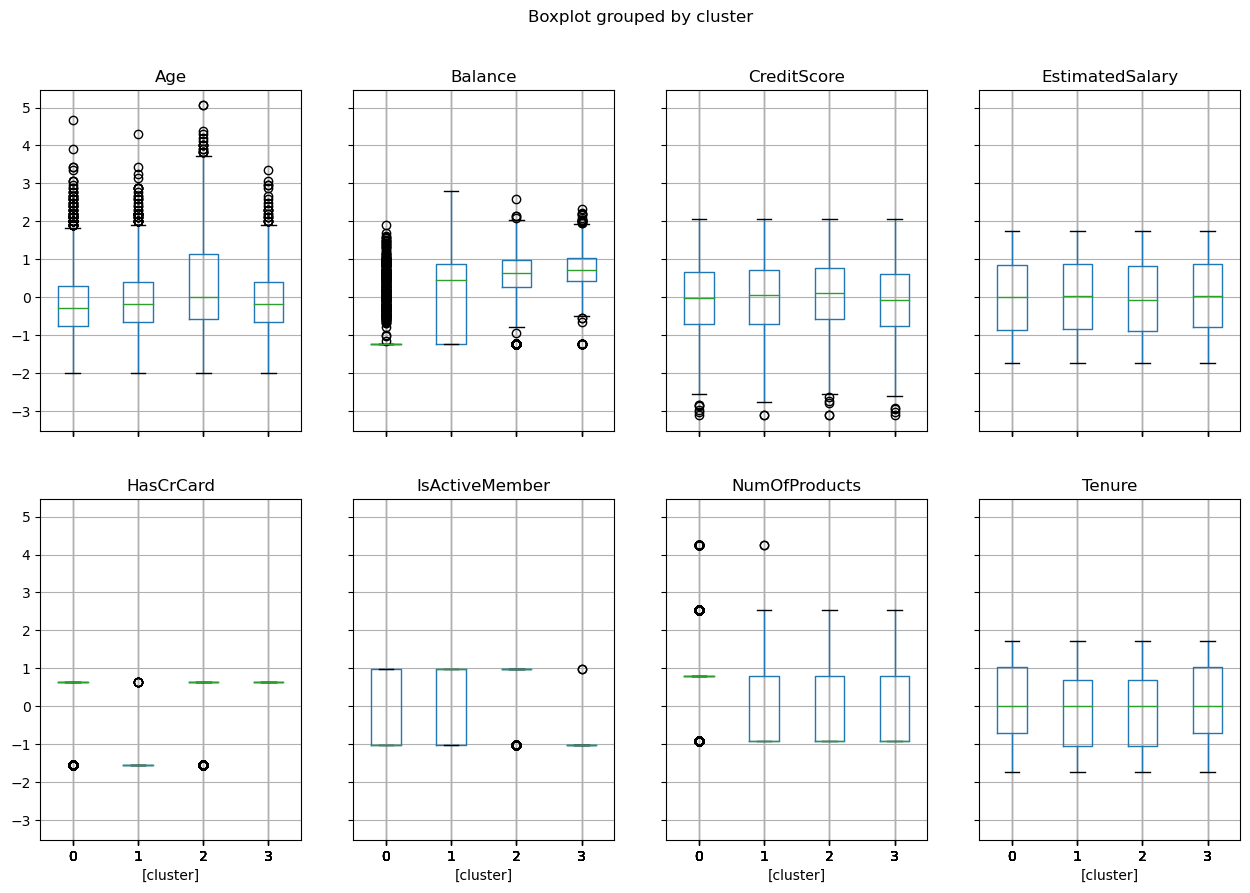

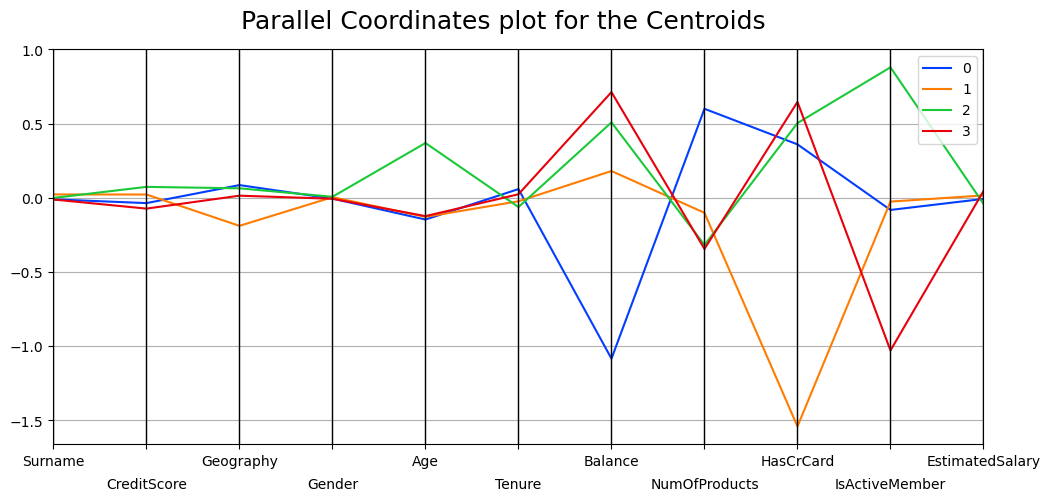

In [51]:
X_clustered.drop(['Surname', 'Gender', 'Geography'], axis=1).boxplot(by="cluster", figsize=(15,10), layout=(2,4))

display_parallel_coordinates_centroids(means.reset_index(), 4)

In [19]:
# df.drop(['Surname', 'Geography', 'Gender'], axis=1, inplace=True)
# df.drop(['Surname', 'Geography', 'Gender'], axis=1, inplace=True)


# df['CustomerId'] = customer_ids
# df['Surname'] = surname_info
# df['Geography'] = geography_info
# df['Gender'] = gender_info
# df['CreditScore'] = credit_score_info
# df['Age'] = age_info
# df['Tenure'] = tenure_info
# df['Balance'] = balance_info
# df['NumOfProducts'] = num_prod_info
# df['HasCrCard'] = has_cr_info
# df['IsActiveMember'] = acive_info
# df['EstimatedSalary'] = esti_sal_info

df['cluster_labels'] = clusters
# df.to_csv('./final_results/clusters_aggl_not_bes.csv', index=False, header=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,cluster_labels
RowNumber,,,,,,,,,,,
1,1115,619,0,0,42,2,1,1,1,1,0
2,1177,608,2,0,41,1,1,0,1,0,0
3,2040,502,0,0,42,8,3,1,0,1,1
4,289,699,0,0,39,1,2,0,0,0,2
5,1822,850,2,0,43,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,1999,771,0,1,39,5,2,1,0,0,0
9997,1336,516,0,1,35,10,1,1,1,0,0
9998,1570,709,0,0,36,7,1,0,1,1,0


array([[<Axes: title={'center': 'Age'}, xlabel='[cluster_labels]'>,
        <Axes: title={'center': 'CreditScore'}, xlabel='[cluster_labels]'>,
        <Axes: title={'center': 'Exited'}, xlabel='[cluster_labels]'>,
        <Axes: title={'center': 'HasCrCard'}, xlabel='[cluster_labels]'>],
       [<Axes: title={'center': 'IsActiveMember'}, xlabel='[cluster_labels]'>,
        <Axes: title={'center': 'NumOfProducts'}, xlabel='[cluster_labels]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[cluster_labels]'>,
        <Axes: >]], dtype=object)

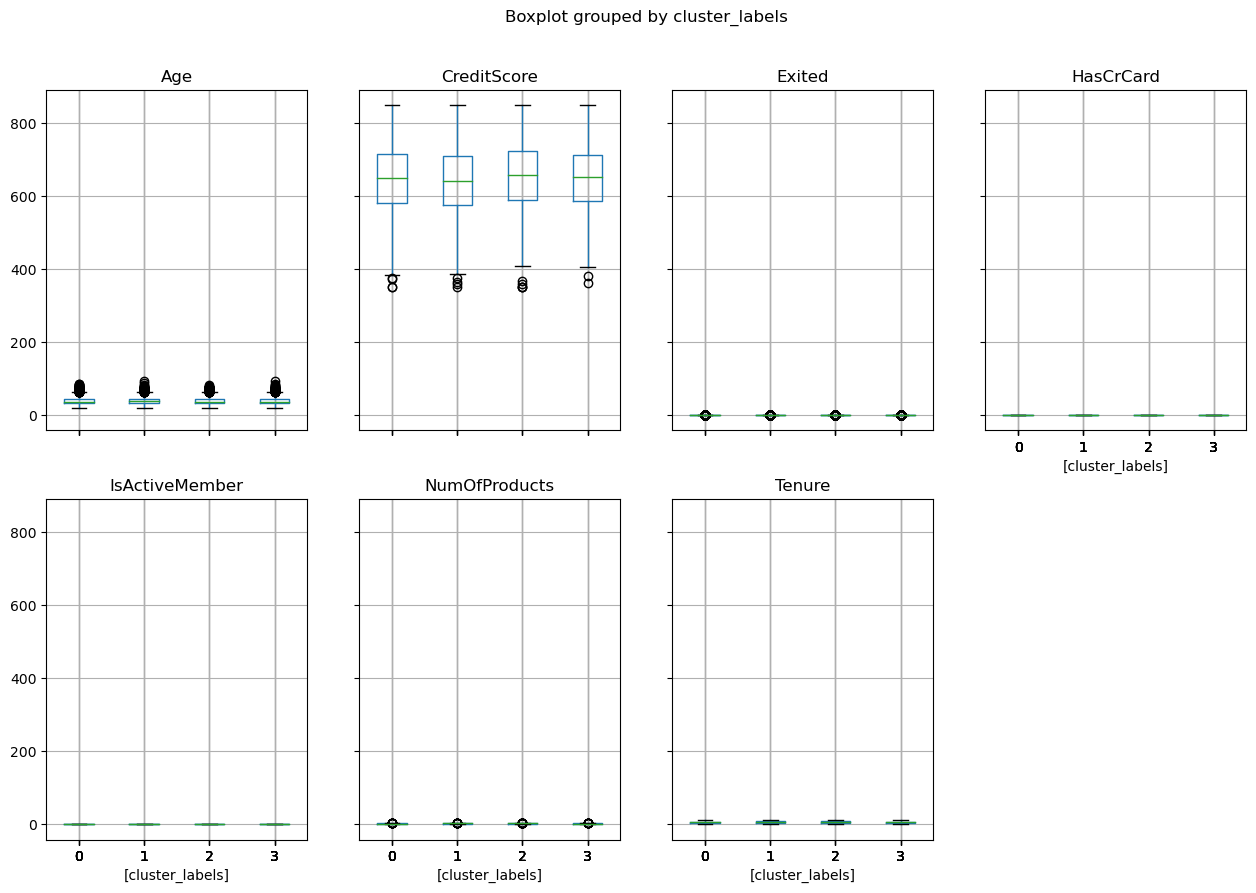

In [20]:
df.drop(['Surname', 'Gender', 'Geography'], axis=1).boxplot(by="cluster_labels", figsize=(15,10), layout=(2,4))

In [12]:
df['cluster_labels'] = clusters
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CustomerId,Surname,Geography,Gender,cluster_labels
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,15634602,Hargrave,France,Female,1
2,608,41,1,83807.86,1,0,1,112542.58,0,15647311,Hill,Spain,Female,2
3,502,42,8,159660.80,3,1,0,113931.57,1,15619304,Onio,France,Female,2
4,699,39,1,0.00,2,0,0,93826.63,0,15701354,Boni,France,Female,1
5,850,43,2,125510.82,1,1,1,79084.10,0,15737888,Mitchell,Spain,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,15606229,Obijiaku,France,Male,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,15569892,Johnstone,France,Male,0
9998,709,36,7,0.00,1,0,1,42085.58,1,15584532,Liu,France,Female,1


In [13]:
df.to_csv('./final_results/clusters.csv', index=False, header=True)

# Density-Based Spatial Clustering of Applications with Noise

In [9]:
from sklearn.cluster import DBSCAN

# ------------------------------------------------------------------------------------------------------
df = pd.read_csv('./Churn_Modelling.csv', index_col=[0])

# ------------------------------------------------------------------------------------------------------

# Converting type of columns to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Surname'] = df['Surname'].astype('category')

# Assigning numerical values and storing it in another columns
df['Geography_new'] = df['Geography'].cat.codes
df['Gender_new'] = df['Gender'].cat.codes
df['Surname_new'] = df['Surname'].cat.codes

df['Geography'] = df['Geography_new']
df['Gender'] = df['Gender_new']
df['Surname'] = df['Surname_new']

df.drop(['CustomerId', 'Surname_new','Geography_new', 'Gender_new'], axis = 1,inplace=True)
# df.drop(['CustomerId', 'Surname','Geography', 'Gender'], axis = 1,inplace=True)
df.head()

# ------------------------------------------------------------------------------------------------------
x = df.drop(columns=['Exited'])
y = df['Exited']

print("Shape of x :: ",x.shape)
print("Shape of y :: ",y.shape)

# ------------------------------------------------------------------------------------------------------



Shape of x ::  (10000, 11)
Shape of y ::  (10000,)


### Searching for best value of epsilon and min_samples

In [38]:
dbscan_columns = ['epsilion', 'min_samples', 'n_clusters', 'n_noise_points', 'silhouette_score']
dbscan_data = []

# Specify the parameters for DBSCAN
epsilon = np.arange(500,2000, 1)  # Maximum distance between two samples to be considered in the same neighborhood
min_samples = np.arange(1,90,1)  # Minimum number of samples in a neighborhood to form a core point

for e in epsilon:
    for m in min_samples:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=e, min_samples=m,n_jobs=-1)
        clusters = dbscan.fit_predict(x)

        # The resulting cluster labels will be assigned to the 'clusters' array

        # Print the number of clusters and noise points (-1)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_points = list(clusters).count(-1)
        # ------------------------------------------------------------------------------------------------------
        
        if n_clusters > 1:
            silhouette_avg = np.round(silhouette_score(x, clusters, random_state=42),decimals=4)
#         print(f"\nFor n_clusters = {2}, the average silhouette_score is: {silhouette_avg}")
        
            dbscan_data.append([e,m,n_clusters, n_noise_points, silhouette_avg])
        else:
            dbscan_data.append([e,m,n_clusters, n_noise_points, -1])
    print(e, end=' ')


500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 

In [40]:
pd.DataFrame(dbscan_data, columns=dbscan_columns).sort_values(by=['silhouette_score'], ascending=False)

,epsilion,min_samples,n_clusters,n_noise_points,silhouette_score
18160,704,5,2,6410,0.4292
18249,705,5,2,6410,0.4292
17893,701,5,2,6411,0.4290
17804,700,5,2,6411,0.4290
18071,703,5,2,6411,0.4290
...,...,...,...,...,...
25665,788,34,0,10000,-1.0000
25666,788,35,0,10000,-1.0000
25667,788,36,0,10000,-1.0000
25668,788,37,0,10000,-1.0000


In [39]:
# pd.DataFrame(dbscan_data, columns=dbscan_columns).to_csv("./final_results/dbscan.csv", header=True, index=False)

In [61]:
a22_dbscan_score = []
x = pd.DataFrame(dbscan_data, columns=dbscan_columns)
for i in range(2,20):
    print((x[x.n_clusters == i].sort_values(by=['silhouette_score'], ascending=False)[:1].values)[0][-1])
    a22_dbscan_score.append((x[x.n_clusters == i].sort_values(by=['silhouette_score'], ascending=False)[:1].values)[0][-1])

0.4292
0.381
0.3747
0.3683
0.3617
0.359
0.3463
0.3579
0.3611
0.3489
0.3488
0.3431
0.3417
0.339
0.3266
0.3268
0.3252
0.3267


# Comparison of all clustering methods

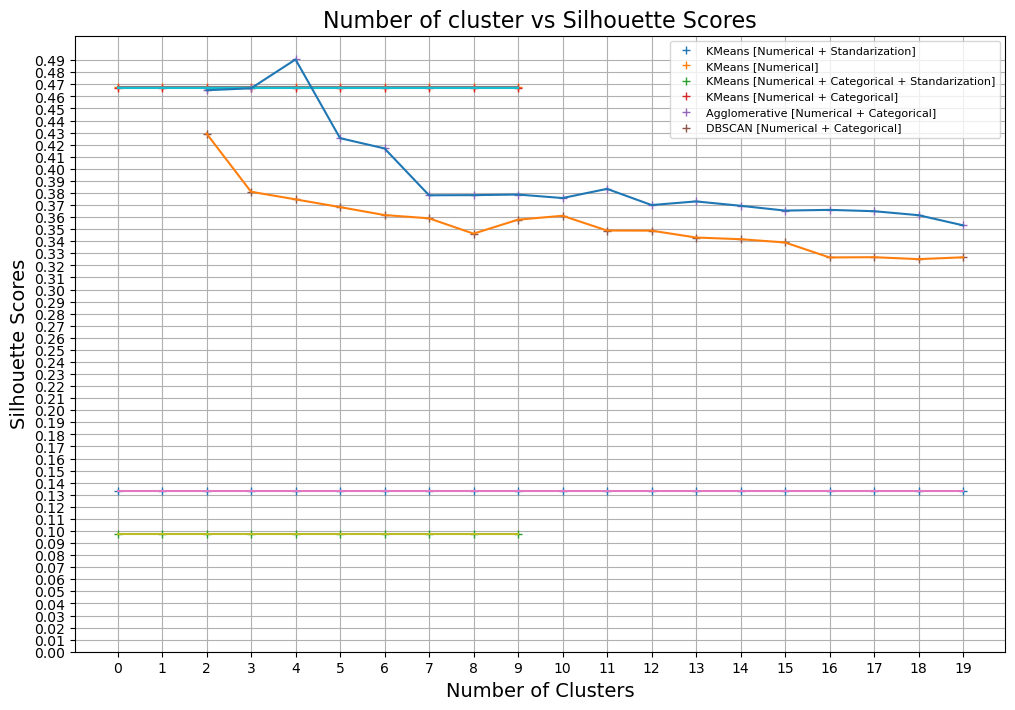

In [67]:
# Setting plot size
plt.rcParams["figure.figsize"] = (12,8)

plt.plot(a11_kmeans_cluster, a11_kmeans_score, '+', label='KMeans [Numerical + Standarization]')
plt.plot(a12_kmeans_cluster, a12_kmeans_score, '+', label='KMeans [Numerical]')
plt.plot(a21_kmeans_cluster, a21_kmeans_score, '+', label='KMeans [Numerical + Categorical + Standarization]')
plt.plot(a22_kmeans_cluster, a22_kmeans_score, '+', label='KMeans [Numerical + Categorical]')
plt.plot(a22_agc_cluster, a22_agc_score, '+', label='Agglomerative [Numerical + Categorical]')
plt.plot(a22_agc_cluster, a22_dbscan_score, '+', label='DBSCAN [Numerical + Categorical]')
# plt.plot(a12_kmeans_cluster, a12_kmeans_score, '+', label='KMeans [only numerical]')
# plt.plot(cluster_list, silhouette_scores_all, '+', label='Agglomerative Clustering')
# plt.plot(cluster_list, silhouette_scores_all, '+', label='Agglomerative Clustering')


# plt.plot(cluster_list, silhouette_scores_all)
plt.plot(a11_kmeans_cluster, a11_kmeans_score)
plt.plot(a12_kmeans_cluster, a12_kmeans_score)
plt.plot(a21_kmeans_cluster, a21_kmeans_score)
plt.plot(a22_kmeans_cluster, a22_kmeans_score)
plt.plot(a22_agc_cluster, a22_agc_score)
plt.plot(a22_agc_cluster, a22_dbscan_score)

plt.xlabel('Number of Clusters',fontsize=14)
plt.ylabel('Silhouette Scores', fontsize=14)

plt.xticks(np.arange(0.0, 20, 1))
plt.yticks(np.arange(0.0, 0.5, 0.01))

plt.legend(prop={'size': 8})
plt.grid()
plt.title("Number of cluster vs Silhouette Scores", fontsize=16)
plt.savefig("./final_results/customer_segmentation.png",bbox_inches='tight')